In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df=pd.read_csv("fedex.csv")
df.to_pickle("fedex.bz2")

### Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [5]:
df1=df[(df['Shipment_Delay']>5) & (df['Shipment_Delay']<15)]

In [6]:
df1['Delivery_Status'].value_counts()

0.0    335961
Name: Delivery_Status, dtype: int64

In [7]:
df[:1]

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0


In [8]:
df['Destination'].unique()

array(['TPA', 'BWI', 'JAX', 'LAS', 'MCI', 'MCO', 'MDW', 'PHX', 'FLL',
       'PBI', 'RSW', 'HOU', 'BHM', 'BNA', 'IND', 'ORF', 'PHL', 'ABQ',
       'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH',
       'DEN', 'ELP', 'GEG', 'IAD', 'ISP', 'LAX', 'LBB', 'LIT', 'MAF',
       'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'PDX', 'PIT', 'PVD',
       'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC',
       'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'JAN', 'HRL',
       'CRP', 'EWR', 'IAH', 'XNA', 'DCA', 'GSO', 'ROC', 'MYR', 'SYR',
       'ATL', 'SAV', 'RIC', 'COS', 'FAT', 'MRY', 'LGB', 'BFL', 'EUG',
       'ICT', 'MSN', 'CAE', 'DAY', 'BTR', 'TLH', 'DFW', 'LFT', 'PWM',
       'SHV', 'MKE', 'CHS', 'CRW', 'HSV', 'TYS', 'MTJ', 'MGM', 'MFE',
       'MSP', 'GSP', 'GRR', 'MEM', 'BTV', 'CLT', 'BRO', 'CVG', 'LGA',
       'VPS', 'LEX', 'BPT', 'PNS', 'ORD', 'ABE', 'LRD', 'BGR', 'GRK',
       'SRQ', 'LCH', 'AEX', 'AVL', 'GPT', 'MLU', 'MOB', 'BOS', 'DSM',
       'CHA', 'CLL',

In [9]:
df.corr()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,-0.001812,0.012715,-0.005670,-0.001967,-0.005680,0.003030,-0.003766,-0.015301,0.006691,-0.021704
DayofMonth,NaN,-0.001812,1.000000,-0.019734,-0.002263,-0.001084,-0.001410,0.001572,0.000338,-0.014667,0.000982,-0.020104
DayOfWeek,NaN,0.012715,-0.019734,1.000000,0.006386,0.006202,0.004809,-0.004535,0.016244,0.009282,0.017889,0.012399
Actual_Shipment_Time,NaN,-0.005670,-0.002263,0.006386,1.000000,0.966004,0.783085,-0.007011,-0.012716,0.212459,-0.014496,0.245400
Planned_Shipment_Time,NaN,-0.001967,-0.001084,0.006202,0.966004,1.000000,0.781966,-0.012320,-0.009922,0.145758,-0.009453,0.187294
Planned_Delivery_Time,NaN,-0.005680,-0.001410,0.004809,0.783085,0.781966,1.000000,-0.022753,0.050734,0.139579,0.040286,0.175581
Carrier_Num,NaN,0.003030,0.001572,-0.004535,-0.007011,-0.012320,-0.022753,1.000000,-0.327497,0.013630,-0.350962,0.011538
Planned_TimeofTravel,NaN,-0.003766,0.000338,0.016244,-0.012716,-0.009922,0.050734,-0.327497,1.000000,0.029844,0.982167,0.025748
Shipment_Delay,NaN,-0.015301,-0.014667,0.009282,0.212459,0.145758,0.139579,0.013630,0.029844,1.000000,0.021445,0.678835


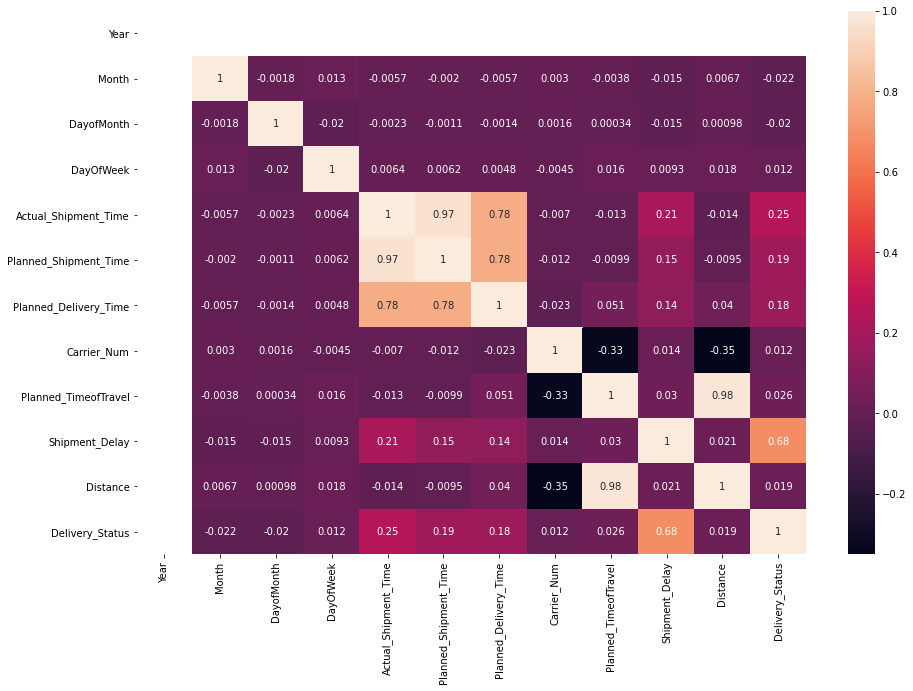

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

### Missisng Value Analysis

In [11]:
df.isnull().sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       547
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status          81602
dtype: int64

In [12]:
df=df.dropna()

### Numerical Value Analysis

In [13]:
df['Delivery_Status'].value_counts('percentage')

0.0    0.796122
1.0    0.203878
Name: Delivery_Status, dtype: float64

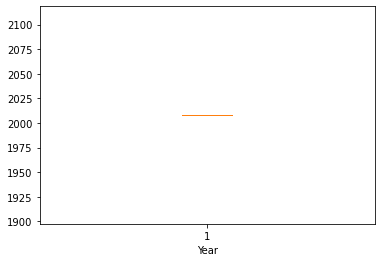

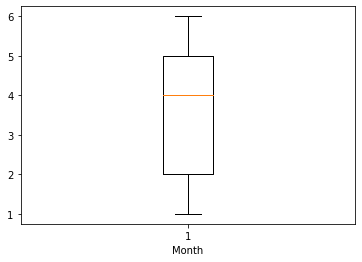

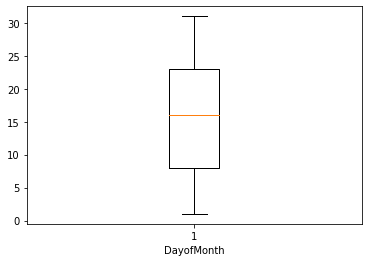

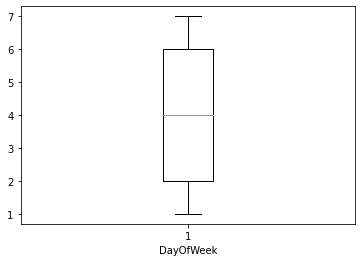

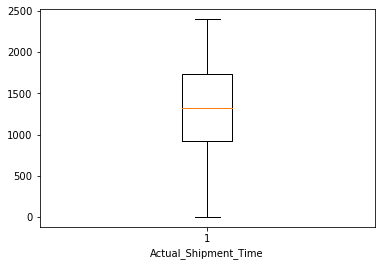

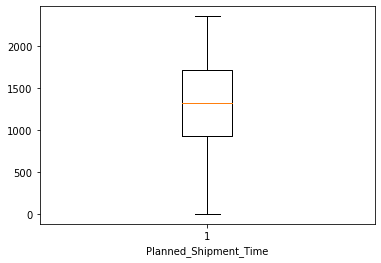

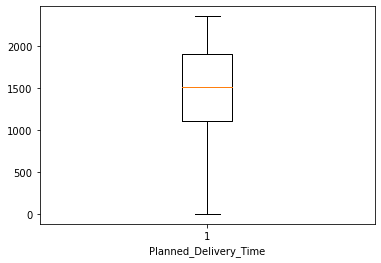

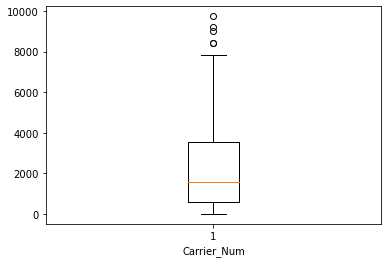

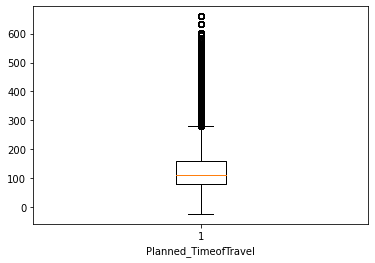

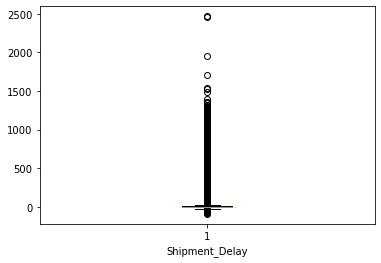

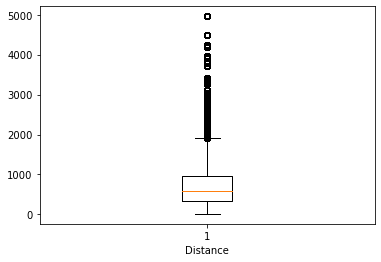

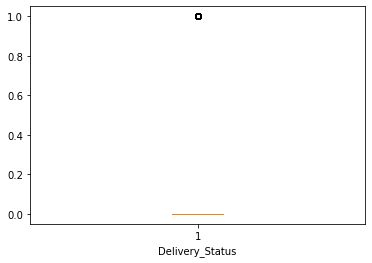

In [14]:
feature_Numeric=[feature for feature in df.columns if df[feature].dtype!='O']
for feature in feature_Numeric:
    plt.boxplot(df[feature])
    plt.xlabel(feature)
    plt.show()
    
    

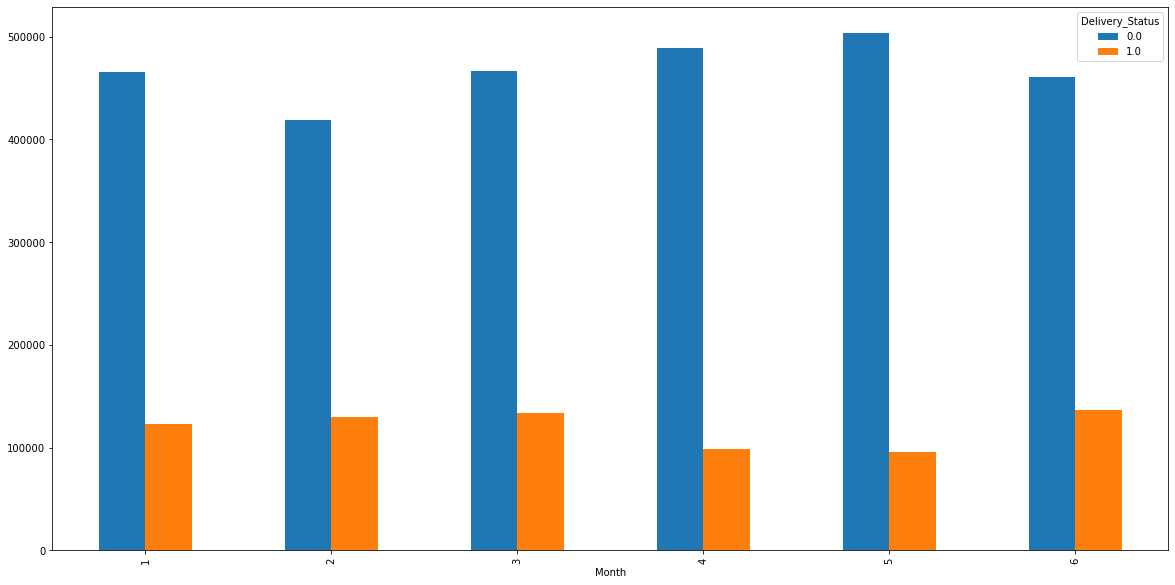

In [15]:
# feature_Numeric=[feature for feature in df.columns if df[feature].dtype!='O']
# for feature in feature_Numeric:
pd.crosstab(df['Month'],df['Delivery_Status']).plot(kind='bar',figsize=(20,10))
    
    

In [16]:
# feature_Numeric=[feature for feature in df.columns if df[feature].dtype!='O']
# for feature in feature_Numeric:
#     plt.scatter(df[feature],df['Delivery_Status'])
#     plt.xlabel(feature)
#     plt.show()
    
    

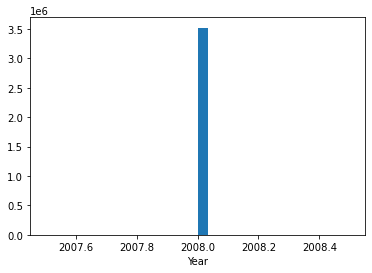

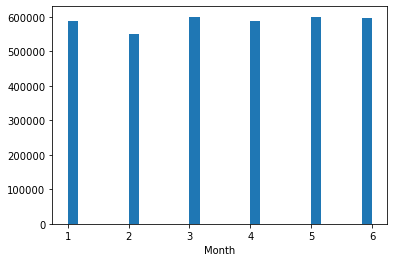

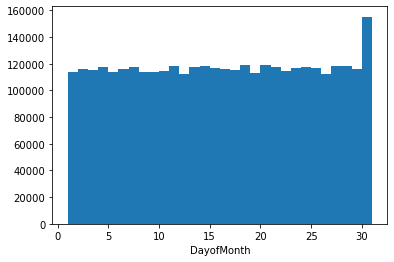

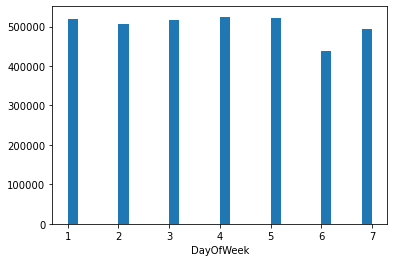

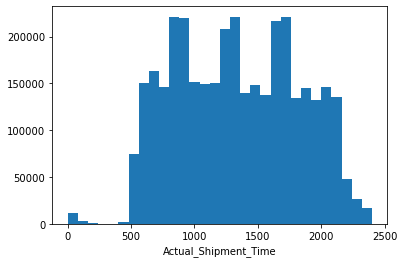

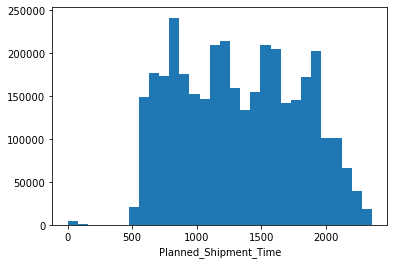

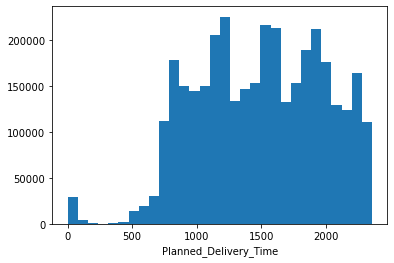

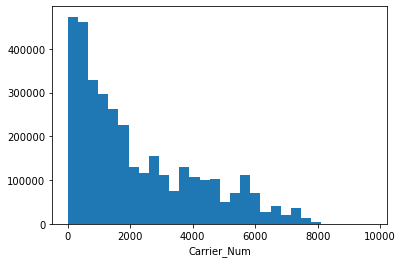

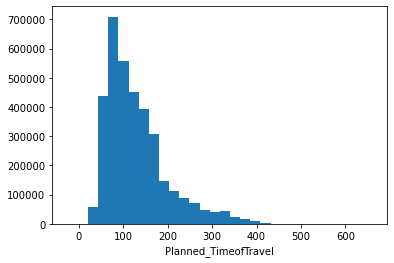

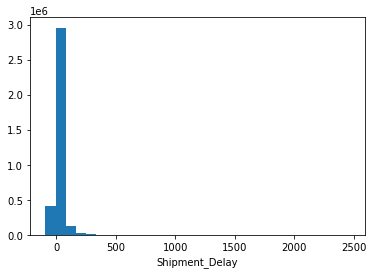

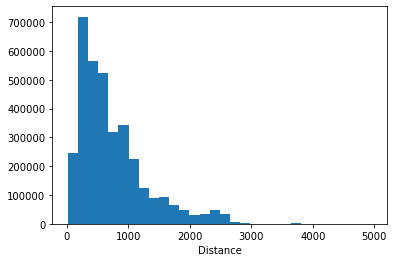

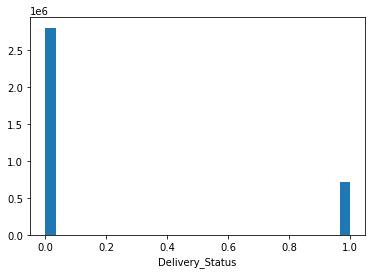

In [17]:
feature_Numeric=[feature for feature in df.columns if df[feature].dtype!='O']
for feature in feature_Numeric:
    plt.plot()
    plt.hist(df[feature],bins=30)
    plt.xlabel(feature)
    plt.show()
    
    

### Categorical Value Analysis

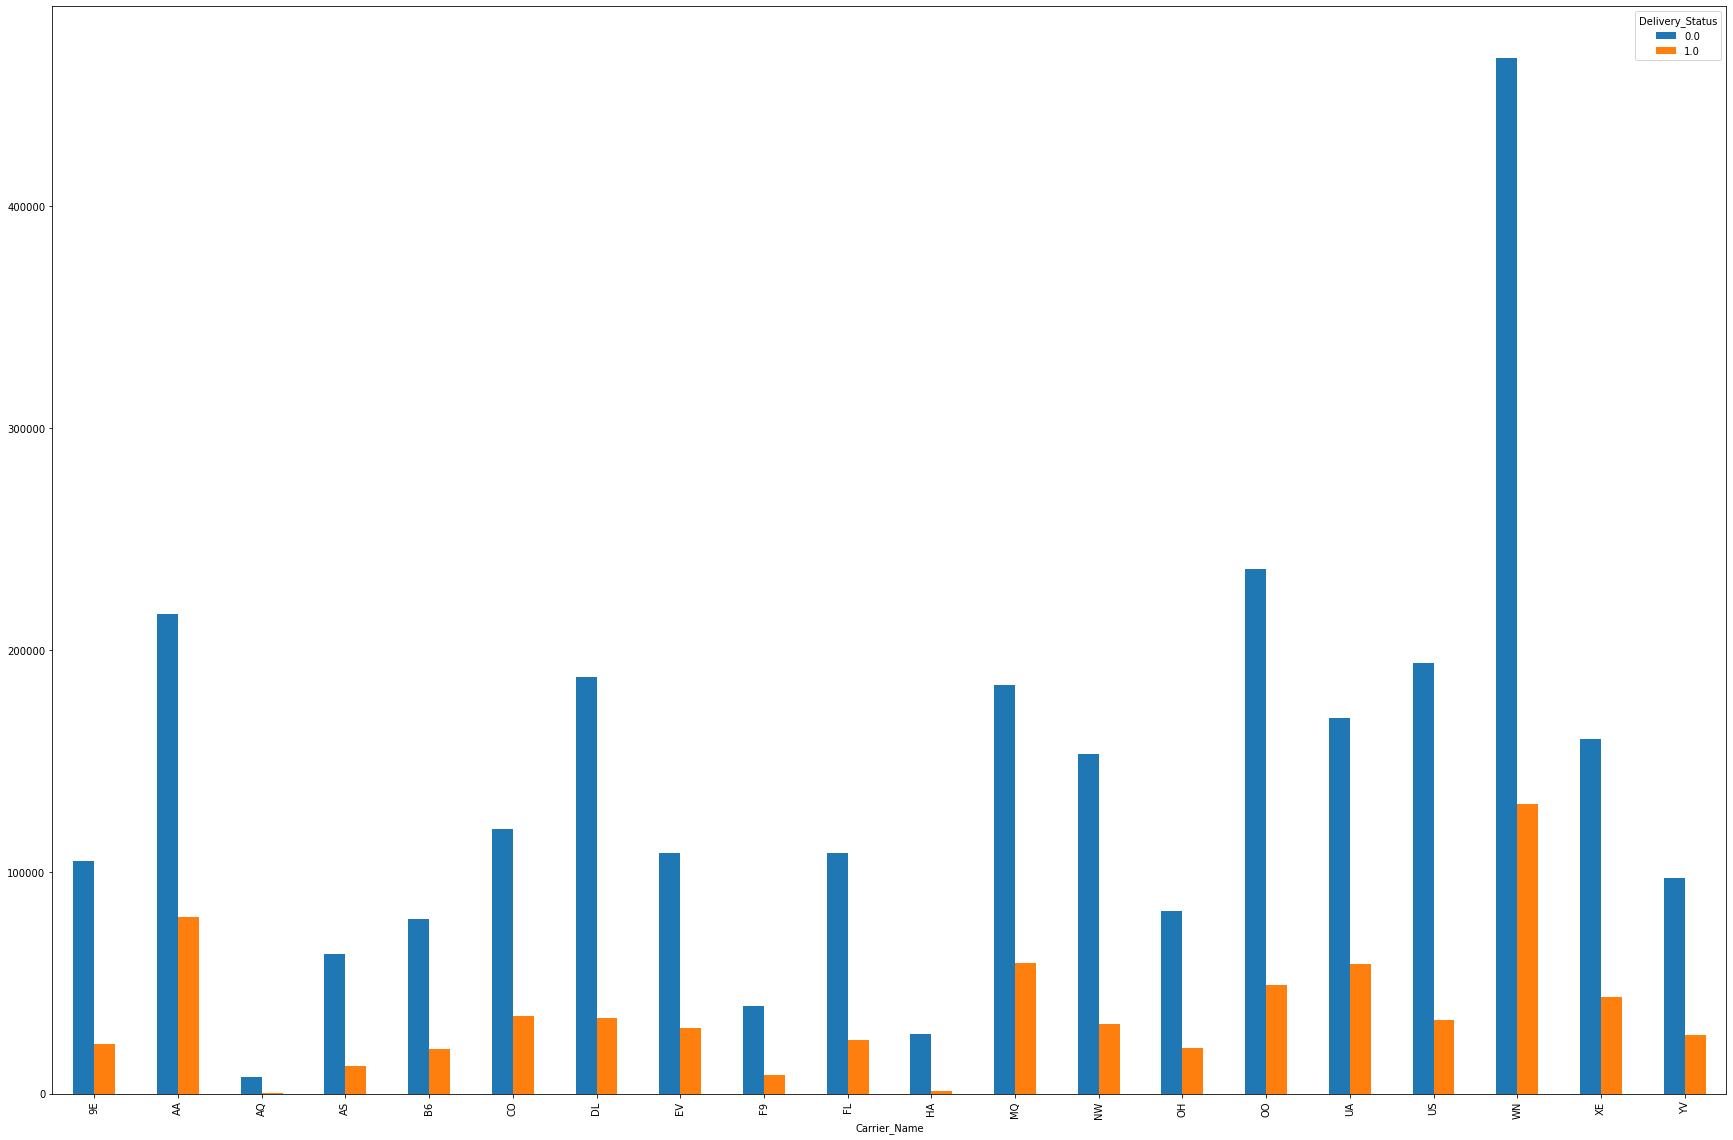

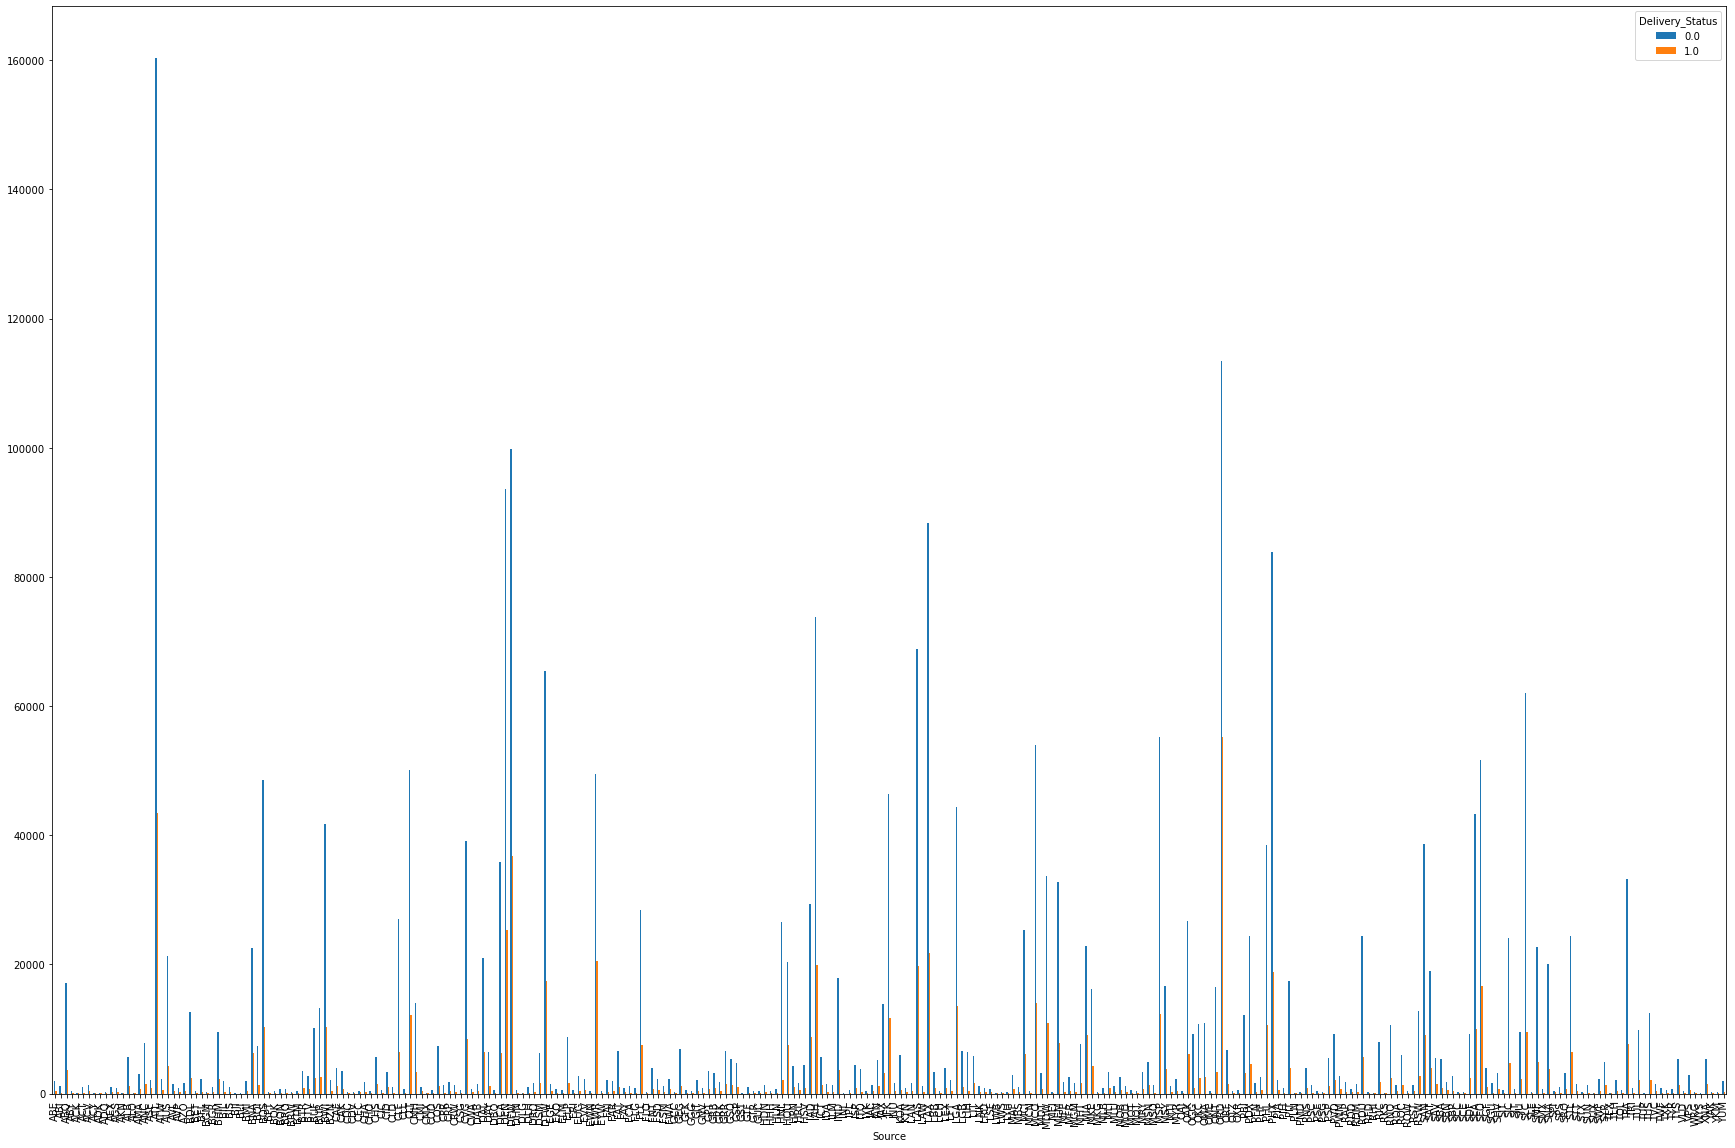

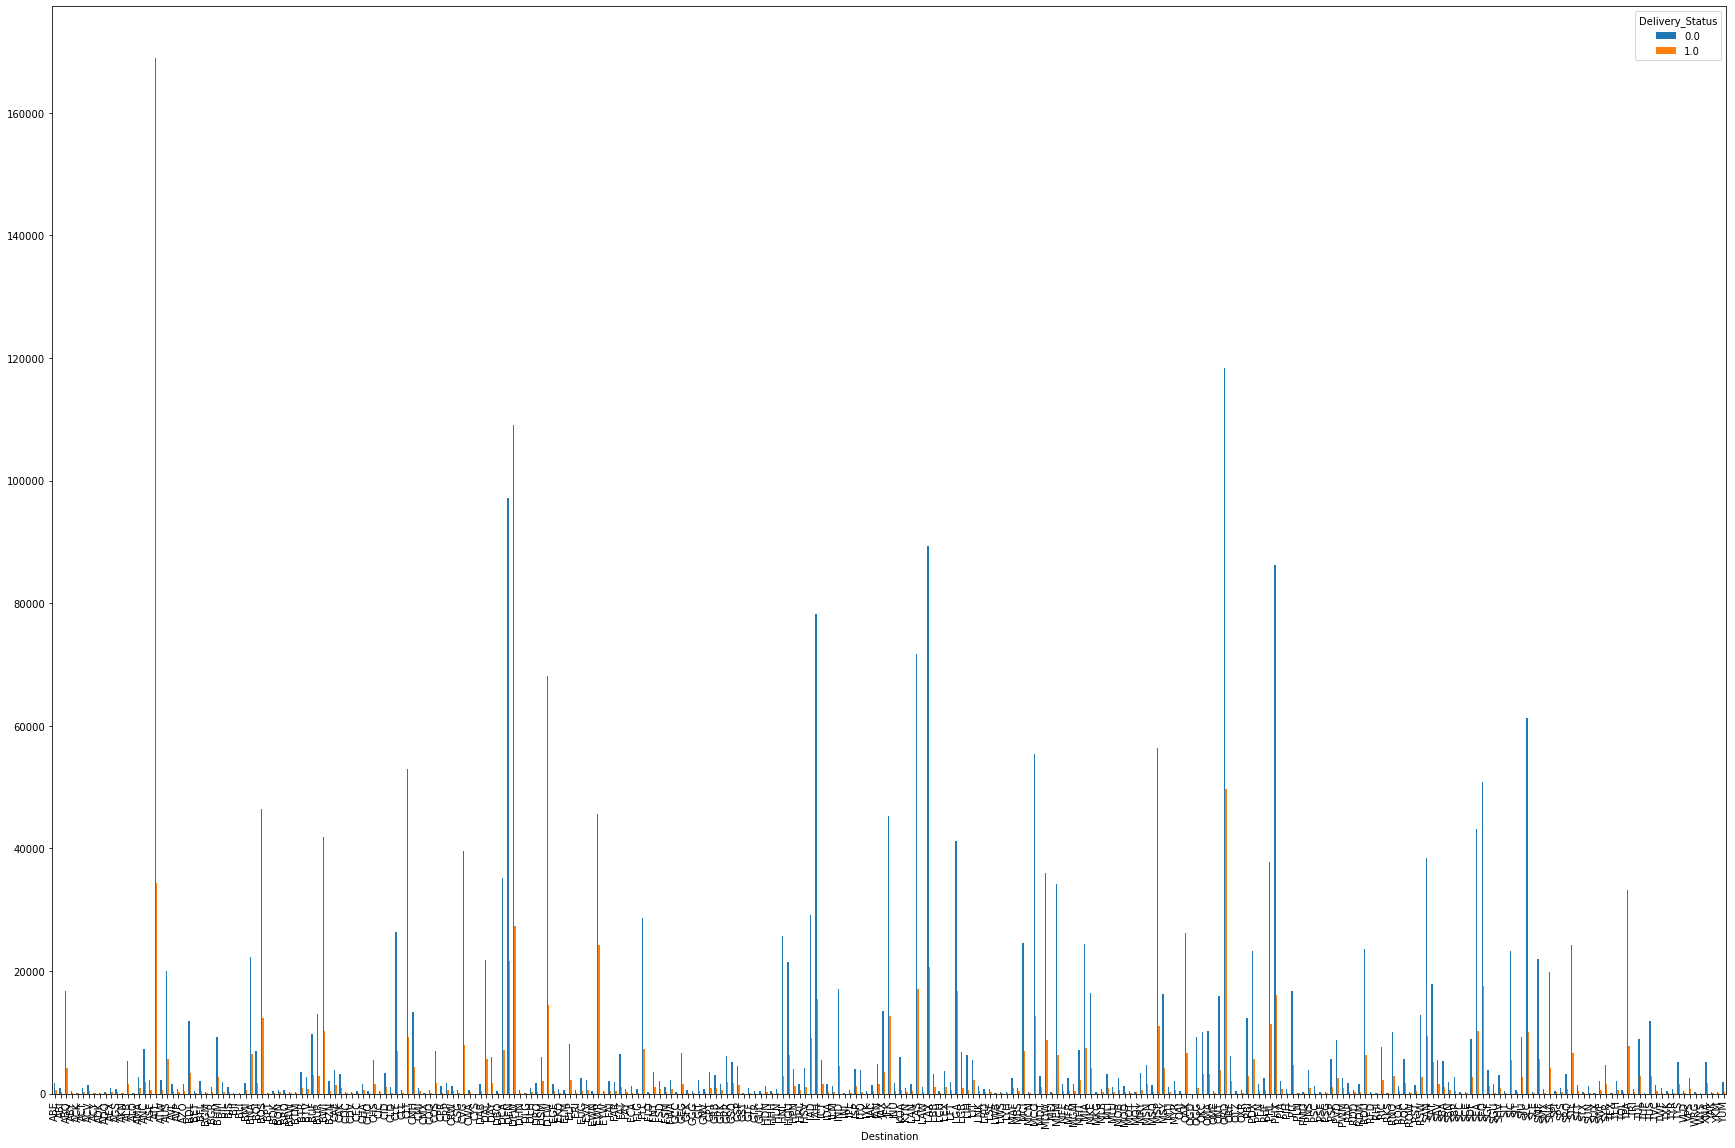

In [18]:
feature_categorical=[feature for feature in df.columns if df[feature].dtype=='O']
for feature in feature_categorical:
    pd.crosstab(df[feature],df['Delivery_Status']).plot(kind='bar',figsize=(30,20))

In [19]:
for feature in feature_categorical:
    print(df[feature].value_counts())

WN    597366
AA    295685
OO    285274
MQ    243102
UA    227599
US    227576
DL    221916
XE    203345
NW    184428
CO    153934
EV    137940
FL    132384
9E    127034
YV    123703
OH    102903
B6     98879
AS     75377
F9     47734
HA     28230
AQ      7758
Name: Carrier_Name, dtype: int64
ATL    203756
ORD    168683
DFW    136553
DEN    118911
LAX    110068
        ...  
AKN        41
BJI        25
INL        24
GST        23
TUP        10
Name: Source, Length: 297, dtype: int64
ATL    203275
ORD    168109
DFW    136365
DEN    118778
LAX    110008
        ...  
INL        25
GST        23
TUP         9
CYS         2
OGD         2
Name: Destination, Length: 299, dtype: int64


In [20]:
df['Source'].value_counts().nlargest(17)

ATL    203756
ORD    168683
DFW    136553
DEN    118911
LAX    110068
PHX    102772
IAH     93630
LAS     88569
DTW     82788
SLC     71555
EWR     70026
SFO     68440
MCO     67961
MSP     67554
CLT     62242
BOS     58714
JFK     58007
Name: Source, dtype: int64

In [21]:
df['Source'].value_counts().quantile(0.95)


59419.59999999996

In [22]:
df['Destination'].value_counts().nlargest(17)

ATL    203275
ORD    168109
DFW    136365
DEN    118778
LAX    110008
PHX    102338
IAH     93581
LAS     88648
DTW     82550
SLC     71389
EWR     69961
SFO     68365
MCO     68002
MSP     67401
CLT     62095
BOS     58777
JFK     57989
Name: Destination, dtype: int64

In [23]:
df['Destination'].value_counts().quantile(0.95)

59108.79999999989

In [24]:
df

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604170,2008,6,19,4,1059.0,1100,1256,DL,1547,236.0,-1.0,ATL,JAC,1572,0.0
3604171,2008,6,19,4,555.0,600,738,DL,1548,98.0,-5.0,RSW,ATL,515,0.0
3604172,2008,6,19,4,821.0,827,1003,DL,1548,96.0,-6.0,ATL,IND,432,0.0
3604173,2008,6,19,4,718.0,735,852,DL,1551,77.0,-17.0,CAE,ATL,191,0.0


In [25]:
df_getdummies=pd.get_dummies(df,columns=['Carrier_Name','Source','Destination'],sparse=True)

In [26]:
df_getdummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3522167 entries, 0 to 3604174
Columns: 628 entries, Year to Destination_YUM
dtypes: Sparse[uint8, 0](616), float64(4), int64(8)
memory usage: 399.7 MB


In [27]:
# # Standardizing
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# feature_Numeric=[feature for feature in df.columns if df[feature].dtype!='O']
# feature_Numeric
# scaler.fit(df[feature_Numeric])
# # df_getdummies.head(5)

In [28]:
df

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604170,2008,6,19,4,1059.0,1100,1256,DL,1547,236.0,-1.0,ATL,JAC,1572,0.0
3604171,2008,6,19,4,555.0,600,738,DL,1548,98.0,-5.0,RSW,ATL,515,0.0
3604172,2008,6,19,4,821.0,827,1003,DL,1548,96.0,-6.0,ATL,IND,432,0.0
3604173,2008,6,19,4,718.0,735,852,DL,1551,77.0,-17.0,CAE,ATL,191,0.0


### Modeling

In [29]:
#target and dependent variable 
y=df_getdummies.Delivery_Status

In [30]:
x=df_getdummies.drop(['Delivery_Status','Year'],axis=1)

In [31]:
x

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,...,Destination_TYR,Destination_TYS,Destination_VLD,Destination_VPS,Destination_WRG,Destination_WYS,Destination_XNA,Destination_YAK,Destination_YKM,Destination_YUM
0,1,3,4,2003.0,1955,2225,335,150.0,8.0,810,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4,754.0,735,1000,3231,145.0,19.0,810,...,0,0,0,0,0,0,0,0,0,0
2,1,3,4,628.0,620,750,448,90.0,8.0,515,...,0,0,0,0,0,0,0,0,0,0
3,1,3,4,926.0,930,1100,1746,90.0,-4.0,515,...,0,0,0,0,0,0,0,0,0,0
4,1,3,4,1829.0,1755,1925,3920,90.0,34.0,515,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604170,6,19,4,1059.0,1100,1256,1547,236.0,-1.0,1572,...,0,0,0,0,0,0,0,0,0,0
3604171,6,19,4,555.0,600,738,1548,98.0,-5.0,515,...,0,0,0,0,0,0,0,0,0,0
3604172,6,19,4,821.0,827,1003,1548,96.0,-6.0,432,...,0,0,0,0,0,0,0,0,0,0
3604173,6,19,4,718.0,735,852,1551,77.0,-17.0,191,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [33]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix,classification_report
# logisticregression=LogisticRegression()
# logisticregression.fit(x_train,y_train)

In [34]:
# accuracy={}
# acc=logisticregression.score(x_test,y_test)*100
# accuracy['LogisticRegression']=acc
# lr_predict=logisticregression.predict(x_test)
# lr_cm=confusion_matrix(lr_predict,y_test)
# print(lr_cm)
# lr_as=classification_report(lr_predict,y_test)
# print(lr_as)

In [35]:
# import pickle 
# filename='finalized_model_LR.pkl'
# pickle.dump(logisticregression,open(filename,'wb'))

In [36]:
# #KNN model
# from sklearn.neighbors import KNeighborsClassifier
# knn=KNeighborsClassifier(n_neighbors=6)
# knn.fit(x_train,y_train)

# knn.predict(x_test)

# acc=knn.score(x_test,y_test)*100
# accuracy['KNearestNeighbors']=acc

# knn_predict=knn.predict(x_test)
# knn_cm=confusion_matrix(knn_predict,y_test)
# print(knn_cm)
# knn_as=classification_report(knn_predict,y_test)
# print(knn_as)

In [37]:
# import pickle 
# filename='finalized_model_KN.pkl'
# pickle.dump(logisticregression,open(filename,'wb'))

In [38]:
# from sklearn.svm import SVC
# svm=SVC(random_state=1)
# svm.fit(x_train,y_train)
# acc=svm.score(x_test,y_test)*100
# accuracy['SupportvectorMachine']=acc

# svm_predict=svm.predict(x_test)
# svm_cm=confusion_matrix(svm_predict,y_test)
# print(svm_cm)
# svm_as=classification_report(svm_predict,y_test)
# print(svm_as)

In [39]:
# import pickle 
# filename='finalized_model_SVC.pkl'
# pickle.dump(logisticregression,open(filename,'wb'))

In [40]:
# from sklearn.naive_bayes import GaussianNB
# nb=GaussianNB()
# nb.fit(x_train,y_train)
# acc=nb.score(x_test,y_test)*100
# accuracy['NaiveBayes']=acc

# nb_predict=nb.predict(x_test)
# nb_cm=confusion_matrix(nb_predict,y_test)
# print(nb_cm)
# nb_as=classification_report(nb_predict,y_test)
# print(nb_as)

In [41]:
# import pickle 
# filename='finalized_model_NB.pkl'
# pickle.dump(logisticregression,open(filename,'wb'))

In [42]:
# from sklearn.tree import DecisionTreeClassifier
# dt=DecisionTreeClassifier()
# dt.fit(x_train,y_train)
# acc=dt.score(x_test,y_test)*100
# accuracy['DecisionTreeClassifier']=acc

# dt_predict=dt.predict(x_test)
# dt_cm=confusion_matrix(dt_predict,y_test)
# print(dt_cm)
# dt_as=classification_report(dt_predict,y_test)
# print(dt_as)

In [43]:
# import pickle 
# filename='finalized_model_DTC.pkl'
# pickle.dump(logisticregression,open(filename,'wb'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train,y_train)
acc=rf.score(x_test,y_test)*100
accuracy['RandomForestClassifier']=acc

rf_predict=rf.predict(x_test)
rf_cm=confusion_matrix(rf_predict,y_test)
print(rf_cm)
rf_as=classification_report(rf_predict,y_test)
print(rf_as)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:509: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
import pickle 
filename='finalized_model_RF.pkl'
pickle.dump(logisticregression,open(filename,'wb'))

In [ ]:
accuracy.values()

In [ ]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette=colors)
plt.show()

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(knn_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(svm_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(nb_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(dt_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(rf_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()